In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("vaccine.csv")
df.head()

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892


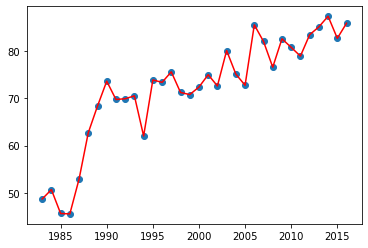

In [2]:
import matplotlib.pyplot as plt

x = df["Year"]
y = df["Values"]
plt.plot(x,y,"r")
plt.scatter(x,y)

In [3]:
train_df = df[:int(len(df)*0.7)]
test_df = df[int(len(df)*0.7):]
X_train = train_df['Year'].values
y_train = train_df['Values'].values
X_test = test_df['Year'].values
y_test = test_df['Values'].values

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.reshape(len(X_train),1),y_train.reshape(len(y_train),1))
results = model.predict(X_test.reshape(len(X_test),1))
results

array([[81.83437635],
       [83.09935437],
       [84.36433239],
       [85.62931041],
       [86.89428843],
       [88.15926645],
       [89.42424447],
       [90.68922249],
       [91.95420051],
       [93.21917853],
       [94.48415655]])

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("线性回归平均绝对误差：",mean_absolute_error(y_test, results.flatten()))
print("线性回归均方误差：",mean_squared_error(y_test, results.flatten()))

线性回归平均绝对误差： 6.011979515629853
线性回归均方误差： 43.53185829515393


In [6]:
from sklearn.preprocessing import PolynomialFeatures


poly_features_2 = PolynomialFeatures(degree = 2, include_bias=False)
poly_X_train_2 = poly_features_2.fit_transform(X_train.reshape(len(X_train),1))
poly_X_test_2 = poly_features_2.fit_transform(X_test.reshape(len(X_test),1))

model = LinearRegression()
model.fit(poly_X_train_2, y_train.reshape(len(X_train),1))
results_2 = model.predict(poly_X_test_2)
results_2.flatten()

array([71.98010746, 70.78151826, 69.38584368, 67.79308372, 66.00323838,
       64.01630767, 61.83229158, 59.45119011, 56.87300326, 54.09773104,
       51.12537344])

In [7]:
print("2次多项式线性回归平均绝对误差：",mean_absolute_error(y_test, results_2.flatten()))
print("2次多项式线性回归均方误差：",mean_squared_error(y_test, results_2.flatten()))

2次多项式线性回归平均绝对误差： 19.792070829678778
2次多项式线性回归均方误差： 464.3290384792495


In [8]:
from sklearn.pipeline import make_pipeline

X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)
y_train = y_train.reshape(len(y_train),1)
for m in [3,4,5]:
    model = make_pipeline(PolynomialFeatures(m,include_bias=False),LinearRegression())
    model.fit(X_train,y_train)
    pre_y = model.predict(X_test)
    print("{}次多项式线性回归平均绝对误差：".format(m),mean_absolute_error(y_test, pre_y.flatten()))
    print("{}次多项式线性回归均方误差：".format(m),mean_squared_error(y_test, pre_y.flatten()))

3次多项式线性回归平均绝对误差： 4.547691990376819
3次多项式线性回归均方误差： 29.933057083341293
4次多项式线性回归平均绝对误差： 4.424715798155921
4次多项式线性回归均方误差： 29.032746251173272
5次多项式线性回归平均绝对误差： 4.3416168864333065
5次多项式线性回归均方误差： 28.22193293725121


Text(0, 0.5, 'MSE')

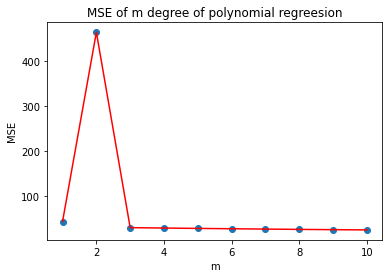

In [9]:
mse = []
m = 1
m_max = 10
while m<=m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False),LinearRegression())
    model.fit(X_train,y_train)
    pre_y = model.predict(X_test)
    mse.append(mean_squared_error(y_test, pre_y.flatten()))
    m+=1

plt.plot([i for i in range(1, m_max+1)], mse ,'r')
plt.scatter([i for i in range(1 , m_max+1)],mse)
plt.title('MSE of m degree of polynomial regreesion')
plt.xlabel('m')
plt.ylabel("MSE")